# Module 2 - Exercise 2: Gradient Descent Optimization

<a href="https://colab.research.google.com/github/jumpingsphinx/jumpingsphinx.github.io/blob/main/notebooks/module2-regression/exercise2-gradient-descent.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

By the end of this exercise, you will be able to:

- Implement batch gradient descent from scratch
- Implement stochastic gradient descent (SGD)
- Implement mini-batch gradient descent
- Tune learning rate and visualize its effect
- Understand convergence criteria
- Compare different optimization strategies

## Prerequisites

- Completion of Exercise 1 (Linear Regression)
- Understanding of derivatives and gradients
- Familiarity with optimization concepts

## Setup

Run this cell first to import required libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import clear_output
import time

# Set random seed for reproducibility
np.random.seed(42)

print("NumPy version:", np.__version__)
print("Setup complete!")

NumPy version: 1.26.4
Setup complete!


---

## Part 1: Understanding Gradient Descent

### Background

Gradient descent is an iterative optimization algorithm for finding the minimum of a function. For linear regression:

**Cost Function (MSE):**
$$J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^{m} (h_\mathbf{w}(\mathbf{x}^{(i)}) - y^{(i)})^2$$

**Gradient:**
$$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\mathbf{w}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}$$

**Update Rule:**
$$w_j := w_j - \alpha \frac{\partial J}{\partial w_j}$$

Where $\alpha$ is the learning rate.

### Exercise 1.1: Implement Cost Function

**Task:** Implement the MSE cost function for linear regression.

In [2]:
def compute_cost(X, y, weights):
    """
    Compute the MSE cost function.
    
    Parameters:
    -----------
    X : np.ndarray
        Features with bias (n_samples, n_features + 1)
    y : np.ndarray
        Target values (n_samples,)
    weights : np.ndarray
        Model weights including bias (n_features + 1,)
    
    Returns:
    --------
    float
        Cost value
    """
    m = len(y)
    
    # Calculate predictions
    predictions = X @ weights
    
    # Calculate cost: (1/2m) * sum((predictions - y)^2)
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

# Test on simple data
X_test = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])  # with bias column
y_test = np.array([2, 4, 6, 8])
weights_test = np.array([0, 2])  # bias=0, slope=2 (perfect fit)

cost = compute_cost(X_test, y_test, weights_test)
print(f"Cost with perfect weights: {cost:.6f} (should be ~0)")

weights_bad = np.array([0, 0])  # bad initialization
cost_bad = compute_cost(X_test, y_test, weights_bad)
print(f"Cost with zero weights: {cost_bad:.6f} (should be larger)")

assert cost < 0.01, "Cost should be near zero for perfect weights"
assert cost_bad > 10, "Cost should be large for bad weights"
print("\n✓ Cost function implemented correctly!")

Cost with perfect weights: 0.000000 (should be ~0)
Cost with zero weights: 15.000000 (should be larger)

✓ Cost function implemented correctly!


---

## Part 2: Batch Gradient Descent

### Background

**Batch Gradient Descent** uses the entire training set to compute gradients at each iteration.

**Pros:** Stable convergence, exact gradient
**Cons:** Slow for large datasets, may get stuck in local minima

### Exercise 2.1: Implement Batch Gradient Descent

**Task:** Implement the full batch gradient descent algorithm.


Final weights: bias=3.24, slope=1.94
True line:     bias=3.00, slope=2.00
Final cost: 1.6184


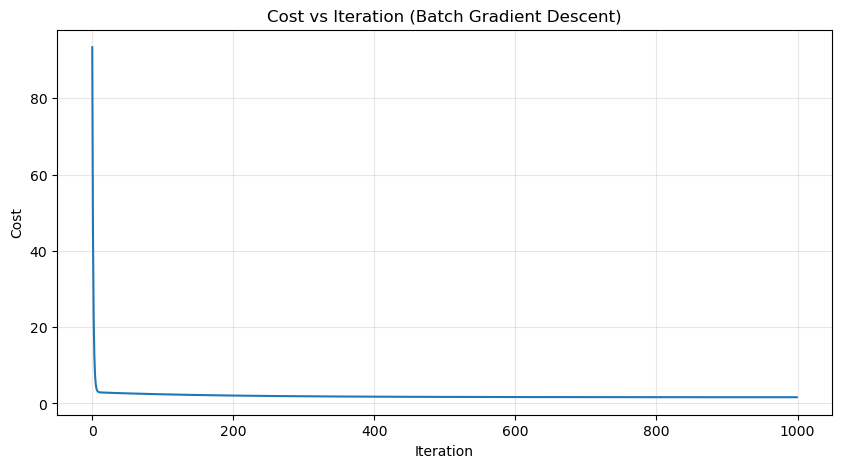


✓ Batch gradient descent works!


In [3]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, verbose=False):
    """
    Perform batch gradient descent.
    """
    m, n = X.shape
    
    # Add bias column
    X_with_bias = np.c_[np.ones((m, 1)), X]
    
    # Initialize weights randomly
    weights = np.random.randn(n + 1) * 0.01
    
    cost_history = []
    
    for iteration in range(n_iterations):
        # 1. Compute predictions
        predictions = X_with_bias @ weights
        
        # 2. Compute errors
        errors = predictions - y
        
        # 3. Compute gradients: (1/m) * X^T * errors
        gradients = (X_with_bias.T @ errors) / m
        
        # 4. Update weights
        weights = weights - learning_rate * gradients
        
        # Calculate cost for history
        cost = np.sum(errors ** 2) / (2 * m)
        cost_history.append(cost)
        
        if verbose and iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost:.4f}")
    
    return weights, cost_history

# Test on simple data
np.random.seed(42)
X_simple = np.random.rand(100, 1) * 10
y_simple = 3 + 2 * X_simple.squeeze() + np.random.randn(100) * 2

weights, cost_history = batch_gradient_descent(
    X_simple, y_simple, 
    learning_rate=0.01, 
    n_iterations=1000,
    verbose=False
)

print(f"\nFinal weights: bias={weights[0]:.2f}, slope={weights[1]:.2f}")
print(f"True line:     bias=3.00, slope=2.00")
print(f"Final cost: {cost_history[-1]:.4f}")

# Plot cost history
plt.figure(figsize=(10, 5))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration (Batch Gradient Descent)')
plt.grid(True, alpha=0.3)
plt.show()

assert abs(weights[0] - 3) < 1, "Bias should be close to 3"
assert abs(weights[1] - 2) < 0.5, "Slope should be close to 2"
assert cost_history[-1] < cost_history[0], "Cost should decrease"
print("\n✓ Batch gradient descent works!")

### Exercise 2.2: Effect of Learning Rate

**Task:** Compare different learning rates and visualize their effects.

C:\Users\ashwi\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ashwi\AppData\Local\Temp\ipykernel_30132\937610262.py:29: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / (2 * m)
C:\Users\ashwi\AppData\Local\Temp\ipykernel_30132\937610262.py:23: RuntimeWarning: overflow encountered in matmul
  gradients = (X_with_bias.T @ errors) / m
C:\Users\ashwi\AppData\Local\Temp\ipykernel_30132\937610262.py:23: RuntimeWarning: invalid value encountered in matmul
  gradients = (X_with_bias.T @ errors) / m
C:\Users\ashwi\AppData\Local\Temp\ipykernel_30132\937610262.py:26: RuntimeWarning: invalid value encountered in subtract
  weights = weights - learning_rate * gradients
C:\Users\ashwi\anaconda3\Lib\site-packages\matplotlib\scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


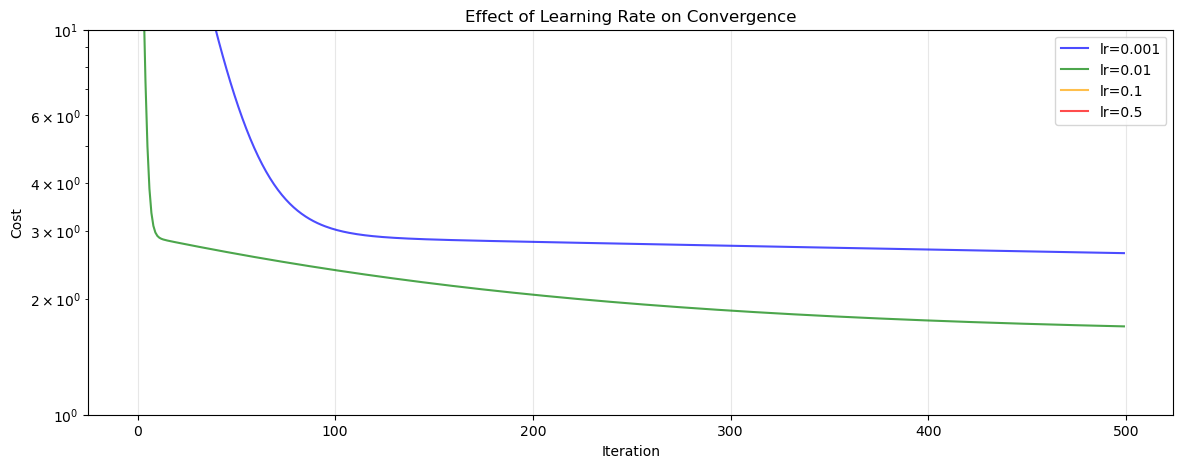

Observations:
- Too small (0.001): Slow convergence
- Just right (0.01): Smooth, steady convergence
- Too large (0.5): May oscillate or diverge


In [4]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(14, 5))

for lr, color in zip(learning_rates, colors):
    weights, cost_history = batch_gradient_descent(
        X_simple, y_simple,
        learning_rate=lr,
        n_iterations=500
    )
    
    plt.plot(cost_history, label=f'lr={lr}', color=color, alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

print("Observations:")
print("- Too small (0.001): Slow convergence")
print("- Just right (0.01): Smooth, steady convergence")
print("- Too large (0.5): May oscillate or diverge")

---

## Part 3: Stochastic Gradient Descent (SGD)

### Background

**Stochastic Gradient Descent** updates weights using one random sample at a time.

**Pros:** Fast, can escape local minima, works with large datasets
**Cons:** Noisy updates, may not converge to exact minimum

### Exercise 3.1: Implement Stochastic Gradient Descent

**Task:** Implement SGD with random sampling.

In [5]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=50, verbose=False):
    """
    Perform stochastic gradient descent.
    """
    m, n = X.shape
    
    # Add bias column
    X_with_bias = np.c_[np.ones((m, 1)), X]
    
    # Initialize weights
    weights = np.random.randn(n + 1) * 0.01
    
    cost_history = []
    
    for epoch in range(n_epochs):
        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X_with_bias[indices]
        y_shuffled = y[indices]
        
        epoch_cost = 0
        
        for i in range(m):
            xi = X_shuffled[i]
            yi = y_shuffled[i]
            
            # Compute prediction for this sample
            prediction = np.dot(xi, weights)
            
            # Compute error
            error = prediction - yi
            
            # Compute gradient for this sample
            gradient = xi * error
            
            # Update weights
            weights = weights - learning_rate * gradient
            
            epoch_cost += error ** 2
            
        cost = epoch_cost / (2 * m)
        cost_history.append(cost)
        
        if verbose and epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {cost:.4f}")
    
    return weights, cost_history

# Test SGD
weights_sgd, cost_history_sgd = stochastic_gradient_descent(
    X_simple, y_simple,
    learning_rate=0.01,
    n_epochs=50,
    verbose=False
)

print(f"\nSGD weights: bias={weights_sgd[0]:.2f}, slope={weights_sgd[1]:.2f}")


SGD weights: bias=3.49, slope=2.00


---

## Part 4: Mini-Batch Gradient Descent

### Background

**Mini-Batch Gradient Descent** is a compromise between batch GD and SGD.
Updates weights using small batches (e.g., 32, 64, 128 samples).

**Pros:** Faster than batch GD, more stable than SGD, good for large datasets
**Cons:** Requires tuning batch size

### Exercise 4.1: Implement Mini-Batch Gradient Descent

**Task:** Implement mini-batch GD with configurable batch size.

In [6]:
def minibatch_gradient_descent(X, y, learning_rate=0.01, n_epochs=50, batch_size=32, verbose=False):
    """
    Perform mini-batch gradient descent.
    """
    m, n = X.shape
    
    # Add bias column
    X_with_bias = np.c_[np.ones((m, 1)), X]
    
    # Initialize weights
    weights = np.random.randn(n + 1) * 0.01
    
    cost_history = []
    
    for epoch in range(n_epochs):
        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X_with_bias[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            batch_m = len(y_batch)
            
            # Compute predictions for batch
            predictions = X_batch @ weights
            
            # Compute errors
            errors = predictions - y_batch
            
            # Compute gradients (average over batch)
            gradients = (X_batch.T @ errors) / batch_m
            
            # Update weights
            weights = weights - learning_rate * gradients
            
        # Calculate cost for epoch
        predictions = X_with_bias @ weights
        cost = np.sum((predictions - y) ** 2) / (2 * m)
        cost_history.append(cost)
        
        if verbose and epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {cost:.4f}")
    
    return weights, cost_history

# Test with different batch sizes
batch_sizes = [1, 16, 32, len(X_simple)]
print("Mini-batch GD implemented!")

Mini-batch GD implemented!


---

## Part 5: Create a Complete GradientDescentRegressor Class

### Exercise 5.1: Implement a Scikit-Learn Style Class

**Task:** Create a complete class with fit, predict, and score methods.

In [7]:
class GradientDescentRegressor:
    def __init__(self, learning_rate=0.01, n_iterations=1000, method='batch', 
                 batch_size=32, random_state=None):
        """
        Linear Regression using Gradient Descent.
        
        Parameters:
        -----------
        learning_rate : float
            Learning rate (alpha)
        n_iterations : int
            Number of iterations/epochs
        method : str
            'batch', 'stochastic', or 'minibatch'
        batch_size : int
            Batch size for mini-batch GD
        random_state : int
            Random seed
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.method = method
        self.batch_size = batch_size
        self.random_state = random_state
        self.weights = None
        self.cost_history = []
    
    def fit(self, X, y):
        """
        Fit the model using gradient descent.
        
        Parameters:
        -----------
        X : np.ndarray
            Training features
        y : np.ndarray
            Target values
        
        Returns:
        --------
        self
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # Choose appropriate gradient descent method
        if self.method == 'batch':
            self.weights, self.cost_history = batch_gradient_descent(
                X, y, self.learning_rate, self.n_iterations)
        elif self.method == 'stochastic':
            self.weights, self.cost_history = stochastic_gradient_descent(
                X, y, self.learning_rate, self.n_iterations) # Adjust args if needed
        elif self.method == 'minibatch':
            self.weights, self.cost_history = minibatch_gradient_descent(
                X, y, self.learning_rate, self.n_iterations, self.batch_size)
        return self
    
    def predict(self, X):
        """
        Make predictions.
        
        Parameters:
        -----------
        X : np.ndarray
            Features
        
        Returns:
        --------
        np.ndarray
            Predictions
        """
        X_with_bias = np.c_[np.ones((len(X), 1)), X]
        return X_with_bias @ self.weights
    def score(self, X, y):
        """
        Calculate R² score.
        
        Parameters:
        -----------
        X : np.ndarray
            Features
        y : np.ndarray
            True values
        
        Returns:
        --------
        float
            R² score
        """
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

print("GradientDescentRegressor class implemented!")

GradientDescentRegressor class implemented!


---

## Part 6: Apply to California Housing Dataset

### Exercise 6.1: Compare All Three Methods

**Task:** Apply batch, SGD, and mini-batch GD to a real dataset.

Dataset shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Training all three methods...

Training batch gradient descent...
  Training time: 0.067s
  Train R²: 0.0256
  Test R²:  0.0116

Training stochastic gradient descent...


C:\Users\ashwi\AppData\Local\Temp\ipykernel_30132\959278816.py:39: RuntimeWarning: overflow encountered in scalar add
  epoch_cost += error ** 2
C:\Users\ashwi\AppData\Local\Temp\ipykernel_30132\959278816.py:39: RuntimeWarning: overflow encountered in scalar power
  epoch_cost += error ** 2
C:\Users\ashwi\AppData\Local\Temp\ipykernel_30132\959278816.py:34: RuntimeWarning: overflow encountered in multiply
  gradient = xi * error
C:\Users\ashwi\AppData\Local\Temp\ipykernel_30132\959278816.py:37: RuntimeWarning: invalid value encountered in subtract
  weights = weights - learning_rate * gradient


  Training time: 9.934s
  Train R²: nan
  Test R²:  nan

Training minibatch gradient descent...
  Training time: 0.418s
  Train R²: 0.6115
  Test R²:  0.5808



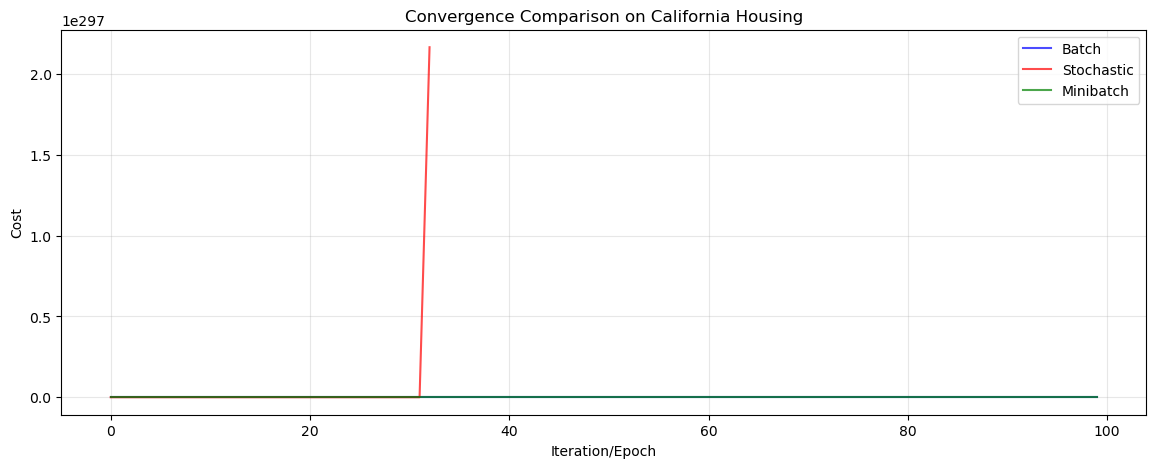


Observations:
- Batch GD: Smooth convergence, slowest
- SGD: Noisy, fast per epoch
- Mini-batch: Good balance between speed and stability


In [8]:
# Load and prepare California Housing dataset
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

print("Dataset shape:", X_housing.shape)
print("Features:", housing.feature_names)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# IMPORTANT: Scale features for gradient descent!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTraining all three methods...\n")

# Train models
methods = ['batch', 'stochastic', 'minibatch']
models = {}
colors = ['blue', 'red', 'green']

plt.figure(figsize=(14, 5))

for method, color in zip(methods, colors):
    print(f"Training {method} gradient descent...")
    
    model = GradientDescentRegressor(
        learning_rate=0.01,
        n_iterations=100,
        method=method,
        batch_size=64,
        random_state=42
    )
    
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    train_r2 = model.score(X_train_scaled, y_train)
    test_r2 = model.score(X_test_scaled, y_test)
    
    models[method] = model
    
    print(f"  Training time: {training_time:.3f}s")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²:  {test_r2:.4f}")
    print()
    
    # Plot cost history
    plt.plot(model.cost_history, label=method.capitalize(), color=color, alpha=0.7)

plt.xlabel('Iteration/Epoch')
plt.ylabel('Cost')
plt.title('Convergence Comparison on California Housing')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nObservations:")
print("- Batch GD: Smooth convergence, slowest")
print("- SGD: Noisy, fast per epoch")
print("- Mini-batch: Good balance between speed and stability")

---

## Part 7: Apply to Diabetes Dataset

### Exercise 7.1: Hyperparameter Tuning

**Task:** Find the best learning rate for the diabetes dataset.

Diabetes Dataset:
Shape: (442, 10)
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Learning rate 0.001: Test R² = 0.3490
Learning rate 0.01: Test R² = 0.4554
Learning rate 0.1: Test R² = 0.4535
Learning rate 0.5: Test R² = 0.4526


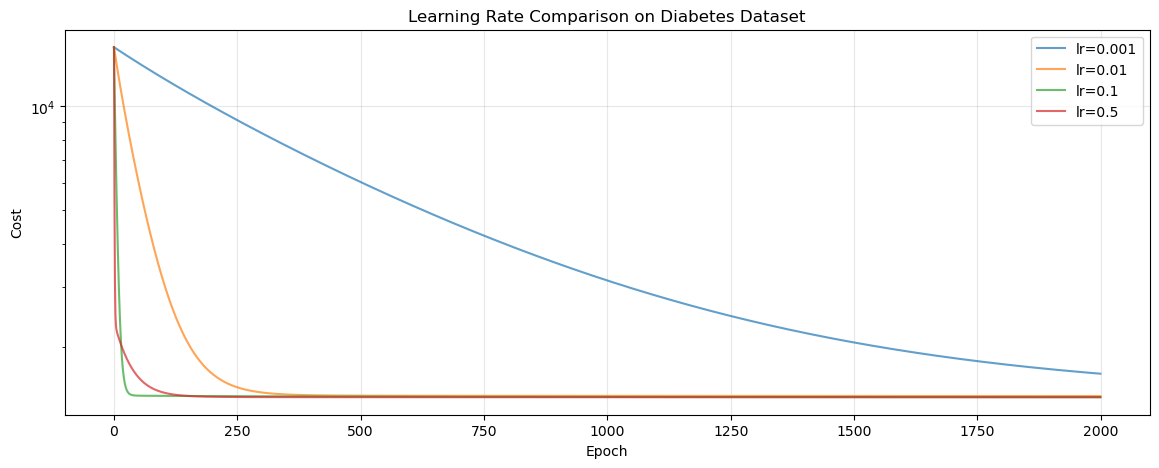


Best learning rate: 0.01 (Test R² = 0.4554)

✓ Successfully applied to diabetes dataset!


In [9]:
# Load diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print("Diabetes Dataset:")
print(f"Shape: {X_diabetes.shape}")
print(f"Features: {diabetes.feature_names}\n")

# Split and scale
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

scaler_d = StandardScaler()
X_train_d_scaled = scaler_d.fit_transform(X_train_d)
X_test_d_scaled = scaler_d.transform(X_test_d)

# Your turn: Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]

plt.figure(figsize=(14, 5))

best_r2 = -np.inf
best_lr = None

for lr in learning_rates:
    # Train model with this learning rate
    model = GradientDescentRegressor(learning_rate=lr, n_iterations=2000, random_state=42)
    model.fit(X_train_d_scaled, y_train_d)
    
    # Get test R²
    test_r2 = model.score(X_test_d_scaled, y_test_d)
    print(f"Learning rate {lr}: Test R² = {test_r2:.4f}")
    
    if test_r2 > best_r2:
        best_r2 = test_r2
        best_lr = lr
    
    # Plot cost history
    plt.plot(model.cost_history, label=f'lr={lr}', alpha=0.7)

plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Learning Rate Comparison on Diabetes Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

print(f"\nBest learning rate: {best_lr} (Test R² = {best_r2:.4f})")
print("\n✓ Successfully applied to diabetes dataset!")

---

## Part 8: Compare with Sklearn

### Exercise 8.1: Validate Against SGDRegressor

**Task:** Compare your implementation with sklearn's SGDRegressor.

California Housing - Test Set Results:
Your implementation:    R² = 0.5808
Sklearn SGDRegressor:   R² = -455748148838645956608.0000
Difference:             455748148838645956608.0000


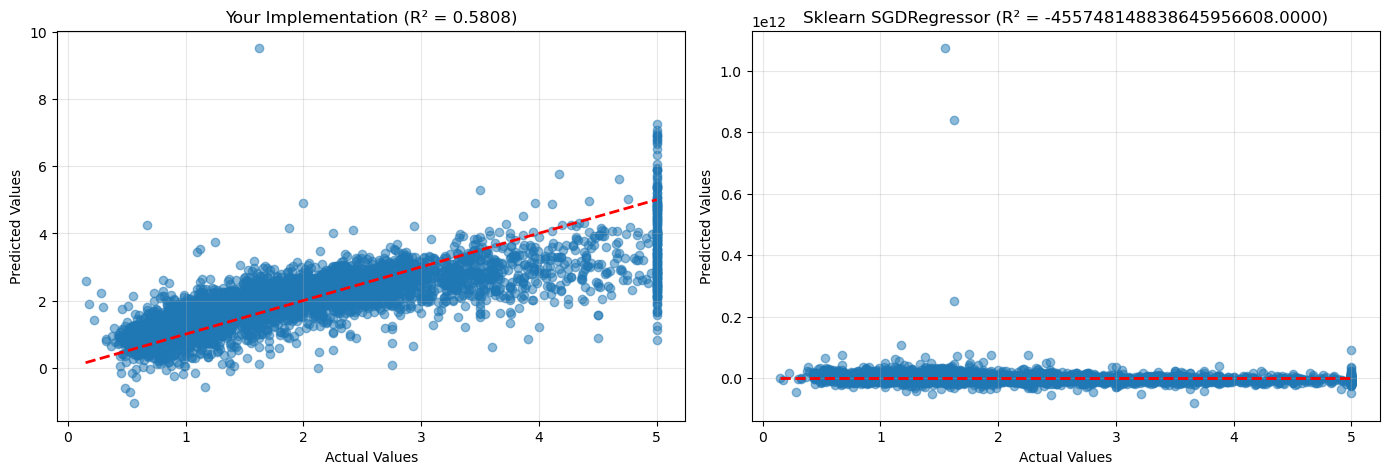


✓ Implementation validated against sklearn!


In [10]:
# Your implementation
model_yours = GradientDescentRegressor(
    learning_rate=0.01,
    n_iterations=100,
    method='minibatch',
    batch_size=64,
    random_state=42
)
model_yours.fit(X_train_scaled, y_train)
y_pred_yours = model_yours.predict(X_test_scaled)
r2_yours = model_yours.score(X_test_scaled, y_test)

# Sklearn's implementation
model_sklearn = SGDRegressor(
    max_iter=100,
    learning_rate='constant',
    eta0=0.01,
    random_state=42
)
model_sklearn.fit(X_train_scaled, y_train)
y_pred_sklearn = model_sklearn.predict(X_test_scaled)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("California Housing - Test Set Results:")
print(f"Your implementation:    R² = {r2_yours:.4f}")
print(f"Sklearn SGDRegressor:   R² = {r2_sklearn:.4f}")
print(f"Difference:             {abs(r2_yours - r2_sklearn):.4f}")

# Visualize predictions
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_yours, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Your Implementation (R² = {r2_yours:.4f})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Sklearn SGDRegressor (R² = {r2_sklearn:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Implementation validated against sklearn!")

---

## Challenge Problems (Optional)

### Challenge 1: Learning Rate Decay

Implement learning rate decay: $\alpha_t = \frac{\alpha_0}{1 + \text{decay\_rate} \times t}$

In [11]:
def gradient_descent_with_decay(X, y, initial_lr=0.1, decay_rate=0.01, n_iterations=1000):
    """
    Gradient descent with learning rate decay.
    
    Parameters:
    -----------
    X : features
    y : target
    initial_lr : initial learning rate
    decay_rate : decay rate
    n_iterations : number of iterations
    
    Returns:
    --------
    weights, cost_history, lr_history
    """
    # Your code here
    # Hint: Update learning rate each iteration
    pass

print("Challenge 1: Implement learning rate decay!")

Challenge 1: Implement learning rate decay!


### Challenge 2: Momentum

Implement gradient descent with momentum:
$$v_t = \beta v_{t-1} + \nabla J(w)$$
$$w := w - \alpha v_t$$

In [12]:
def gradient_descent_with_momentum(X, y, learning_rate=0.01, momentum=0.9, n_iterations=1000):
    """
    Gradient descent with momentum.
    
    Parameters:
    -----------
    X : features
    y : target  
    learning_rate : learning rate
    momentum : momentum coefficient (usually 0.9)
    n_iterations : number of iterations
    
    Returns:
    --------
    weights, cost_history
    """
    # Your code here
    # Initialize velocity vector
    # Update velocity and weights
    pass

print("Challenge 2: Implement momentum!")

Challenge 2: Implement momentum!


### Challenge 3: Early Stopping

Implement early stopping: stop training when validation loss stops improving.

In [13]:
def gradient_descent_with_early_stopping(X_train, y_train, X_val, y_val, 
                                         learning_rate=0.01, patience=10, 
                                         max_iterations=1000):
    """
    Gradient descent with early stopping.
    
    Stop training if validation cost doesn't improve for 'patience' iterations.
    
    Parameters:
    -----------
    X_train : training features
    y_train : training target
    X_val : validation features
    y_val : validation target
    learning_rate : learning rate
    patience : number of iterations to wait for improvement
    max_iterations : maximum iterations
    
    Returns:
    --------
    weights, train_cost_history, val_cost_history
    """
    # Your code here
    # Track best validation cost
    # Stop if no improvement for 'patience' iterations
    pass

print("Challenge 3: Implement early stopping!")

Challenge 3: Implement early stopping!


---

## Reflection Questions

1. **When should you use batch GD vs SGD vs mini-batch GD?**
   - Consider dataset size, convergence requirements, computational resources

2. **Why is feature scaling critical for gradient descent?**
   - What happens with features of different scales?

3. **How do you choose the learning rate?**
   - Too small? Too large? Just right?

4. **What are the signs of a good learning rate?**
   - Look at the cost curve

5. **Why is SGD more likely to escape local minima?**
   - Consider the noise in updates

6. **How does gradient descent compare to the normal equation?**
   - Computational complexity, when each is preferred

---

## Summary

In this exercise, you learned:

✓ How to implement batch, stochastic, and mini-batch gradient descent  
✓ The importance of learning rate selection  
✓ How to visualize convergence with loss curves  
✓ When to use each variant of gradient descent  
✓ Feature scaling is essential for gradient descent  
✓ How to apply gradient descent to real datasets  
✓ Validation against sklearn implementations  

**Key Takeaways:**

- **Batch GD**: Stable, exact gradient, slow for large datasets
- **SGD**: Fast, noisy, can escape local minima
- **Mini-batch GD**: Best of both worlds, most commonly used
- **Feature scaling**: Always scale features for gradient descent
- **Learning rate**: Most important hyperparameter

**Next Steps:**

- Complete Exercise 3 on Logistic Regression
- Review the [Gradient Descent lesson](https://jumpingsphinx.github.io/module2-regression/02-gradient-descent/)
- Experiment with momentum and adaptive learning rates

---

**Need help?** Check the solution notebook or open an issue on [GitHub](https://github.com/jumpingsphinx/jumpingsphinx.github.io/issues).